In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
os.environ['PROCESS_NAME']='ZH'

In [4]:
from analysis.processor import Processor

In [5]:
from analysis.custom import *

In [6]:
from config.selectionconfig import runsetting as rs

## Test processors/load files for unit tests

In [7]:
PREFIX = "root://cmseos.fnal.gov"

In [10]:
rs.DELAYED_OPEN=True
rs.COPY_LOCAL=True

In [11]:
import numpy as np

In [13]:
from analysis.spawndask import transferP, evtselclass, JobRunner

### load one sample root file

In [57]:
# define helper functions that help understand object methods
def get_method(object):
    object_methods = [method_name for method_name in dir(object) if callable(getattr(object, method_name))]
    print(object_methods)
    return None

import inspect

In [58]:
ZHfi = "root://cmsxrootd.fnal.gov//store/mc/Run3Summer22EENanoAODv12/ZH_Hto2B_Zto2Q_M-125_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/64a19312-565d-4c2e-a214-4547cc4fe621.root"

In [59]:
proc = Processor(rs, 'ZH', transferP, evtselclass)
print(transferP)

Deleting instance of skimEvtSel
/store/user/joyzhou/tests/ZH


In [60]:
daskargs = JobRunner.get_meta_daskargs(ZHfi, None)

In [61]:
event1, copied = proc.loadfile(ZHfi, 1, daskargs)

In [62]:
# inspect event1 type
print(type(event1))
print(event1)

<class 'dask_awkward.lib.core.Array'>
dask.awkward<from-uproot, npartitions=4>


In [63]:
inspect.getmembers(event1, inspect.ismethod)

[('__dir__',
  <bound method Array.__dir__ of dask.awkward<from-uproot, npartitions=4>>),
 ('__eq__',
  <bound method _binary_method.<locals>.func of dask.awkward<from-uproot, npartitions=4>>),
 ('__ge__',
  <bound method _binary_method.<locals>.func of dask.awkward<from-uproot, npartitions=4>>),
 ('__gt__',
  <bound method _binary_method.<locals>.func of dask.awkward<from-uproot, npartitions=4>>),
 ('__init__',
  <bound method Array.__init__ of dask.awkward<from-uproot, npartitions=4>>),
 ('__le__',
  <bound method _binary_method.<locals>.func of dask.awkward<from-uproot, npartitions=4>>),
 ('__lt__',
  <bound method _binary_method.<locals>.func of dask.awkward<from-uproot, npartitions=4>>),
 ('__ne__',
  <bound method _binary_method.<locals>.func of dask.awkward<from-uproot, npartitions=4>>),
 ('__reduce__',
  <bound method Array.__reduce__ of dask.awkward<from-uproot, npartitions=4>>),
 ('__repr__',
  <bound method Array.__repr__ of dask.awkward<from-uproot, npartitions=4>>),
 ('__s

In [64]:
proc.evtsel = proc.evtselclass(**proc.evtsel_kwargs)
passed_event1 = proc.evtsel(event1)

In [65]:
# inspect passed_event1 type
print(type(passed_event1))
print(passed_event1)

<class 'dask_awkward.lib.core.Array'>
dask.awkward<getitem, npartitions=4>


In [ ]:
proc.writedask(passed_event1, 1)

In [10]:
fi1 = f"{PREFIX}//store/user/joyzhou/vetoskim_hadded/DYJets/DYJetsToLL_M-50_1.root"
fi2 = f"{PREFIX}//store/user/joyzhou/vetoskim_hadded/DYJets/DYJetsToLL_M-50_2.root"

In [11]:
proc = Processor(rs, 'DYJets', transferP, evtselclass)

In [12]:
daskargs = JobRunner.get_meta_daskargs(fi1, None)

In [21]:
event1 = proc.loadfile(fi1, 12, daskargs)

Not delayed!


In [13]:
proc.runfile(fi2, 10, {})

Not delayed!
Trying to add >= 2 Medium hadronic Taus mask!
Trying to add Tau dR >= 0.5 mask!
Trying to add >=2 ak4 jets mask!
Trying to add ==1 Loose B-tagged mask!
Cutflow written to local!
Run: [ERROR] Invalid operation: file exists

Run: [ERROR] Invalid operation: file exists



0

In [15]:
# filename = f"{PREFIX}//store/user/joyzhou/vetoskim_hadded/ZH/ZH_HToBB_ZToLL_M-125_1.root"
filename = f"{PREFIX}//store/user/joyzhou/vetoskim_hadded/ggF/GluGlutoHHto2B2Tau_kl-1p00_kt-1p00_c2-0p00_2.root"
# filename = "root://cmsxrootd.fnal.gov//store/mc/Run3Summer22EENanoAODv11/ZH_Hto2B_Zto2L_M-125_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/126X_mcRun3_2022_realistic_postEE_v1-v1/50000/112473a8-9ebd-4323-ac6f-a0863a245789.root"
# filename = "root://cmsxrootd.fnal.gov//store/mc/Run3Summer22EENanoAODv10/GluGluHToTauTau_M-125_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/Poisson60KeepRAW_124X_mcRun3_2022_realistic_postEE_v1-v1/50000/167aa683-792b-4e46-8d17-80101f33ac6a.root"

In [21]:
proc = Processor(rs, 'ggF', transferP, evtselclass)

In [22]:
proc.runfile(filename, 17)

Not delayed!
Trying to add >= 2 Medium hadronic Taus mask!
Trying to add Tau dR >= 0.5 mask!
Trying to add >=2 Medium B-tagged jets mask!
Cutflow written to local!


0

In [23]:
import pandas as pd

In [27]:
outputfi = '/uscms/home/joyzhou/nobackup/ggF/ggF_output_17.csv'
outputdf = pd.read_csv(outputfi, index_col=0)

In [33]:
outputdf.__dict__

{'_is_copy': None,
 '_mgr': BlockManager
 Items: Index(['LeadingTau_pt', 'LeadingTau_eta', 'LeadingTau_phi', 'LeadingTau_mass',
        'LeadingTau_dxy', 'LeadingTau_dz', 'LeadingTau_jetidx',
        'LeadingTau_charge', 'LeadingTau_idvsjet', 'LeadingTau_idvsmu',
        'LeadingTau_idvse', 'LeadingTau_genflav', 'SubleadingTau_pt',
        'SubleadingTau_eta', 'SubleadingTau_phi', 'SubleadingTau_mass',
        'SubleadingTau_dxy', 'SubleadingTau_dz', 'SubleadingTau_jetidx',
        'SubleadingTau_charge', 'SubleadingTau_idvsjet', 'SubleadingTau_idvsmu',
        'SubleadingTau_idvse', 'SubleadingTau_genflav', 'LeadingBjet_pt',
        'LeadingBjet_eta', 'LeadingBjet_phi', 'LeadingBjet_mass',
        'LeadingBjet_btag', 'LeadingBjet_deepJetCvsB', 'LeadingBjet_jetid',
        'SubleadingBjet_pt', 'SubleadingBjet_eta', 'SubleadingBjet_phi',
        'SubleadingBjet_mass', 'SubleadingBjet_btag',
        'SubleadingBjet_deepJetCvsB', 'SubleadingBjet_jetid',
        'Generator_weight_values', 

In [21]:
np.sum(proc.evtsel.objsel.any('>= 2 Medium hadronic Taus'))

28067

In [19]:
from analysis.evtselutil import Object
from utils.cutflowutil import weightedSelection
import numpy as np
import awkward as ak

In [13]:
proc = Processor(rs, 'ggF', transferP, evtselclass)
events = proc.loadfile(filename, 10)
len(events)

Not delayed!


49380

In [14]:
tauid0_mk = abs(events['GenPart_pdgId']) == 15

In [20]:
evt_msk = (ak.sum(tauid0_mk, axis=-1) > 0)

In [23]:
events[evt_msk]['GenPart_status'] == 

<Array [[21, 21, 22, 22, 23, ..., 1, 1, 1, 1], ...] type='49380 * var * int32'>

In [67]:
tau = Object(events, "Tau", weakrefEvt=True)
def tauobjmask(tau: 'Object'):
    tau_mask = (tau.ptmask(opr.ge) & \
                tau.absetamask(opr.le) & \
                tau.absdzmask(opr.lt) & \
                tau.custommask('idvsjet', opr.ge) & \
                tau.custommask('idvsmu', opr.ge) & \
                tau.custommask('idvse', opr.ge))
    return tau_mask
tau_nummask = tau.numselmask(tauobjmask(tau), opr.ge)

In [68]:
events = events[tau_nummask]

In [69]:
jet = Object(events, 'Jet')

In [70]:
def jobjmask(jet: 'Object'):
    j_mask = (jet.ptmask(opr.ge) &
          jet.absetamask(opr.le) &
          jet.custommask('btag', opr.ge))
    tau_ldvec = Object.fourvector(jet.events, 'Tau')[:,0]
    tau_sdvec = Object.fourvector(jet.events, 'Tau')[:,1]
    jetdR_mask = jet.dRwOther(tau_ldvec, 0.5) & jet.dRwOther(tau_sdvec, 0.5)
    print(f"size of dR_mask: {len(jetdR_mask)}")
    return j_mask & jetdR_mask

In [71]:
jet_mask = jobjmask(jet)

size of dR_mask: 17790


In [72]:
jet_nummask = jet.numselmask(jet_mask, opr.ge)
events = events[jet_nummask]

In [74]:
jet.events = events

In [75]:
j_mask = jobjmask(jet)

size of dR_mask: 7510


In [76]:
jnm = jet.numselmask(j_mask, opr.ge)
np.sum(jnm)

7510

In [22]:
newevents = events[jet.numselmask(jet_mask, opr.ge)]

In [23]:
jet.events = newevents

In [54]:
newmask = jobjmask(jet)

In [55]:
ld_j, sd_j = jet.getldsd(mask=newmask)

In [19]:
tau = Object(events, "Tau", weakrefEvt=True)

In [20]:
def tauobjmask(tau: 'Object'):
    tau_mask = (tau.ptmask(opr.ge) & \
                tau.absetamask(opr.le) & \
                tau.absdzmask(opr.lt) & \
                # tau.custommask('idvsjet', opr.ge) & \
                tau.custommask('idvsmu', opr.ge) & \
                tau.custommask('idvse', opr.ge))
    return tau_mask

In [22]:
tau_nummask = tau.numselmask(tauobjmask(tau), opr.ge)

In [23]:
wsel = weightedSelection(events['Generator_weight'])
wsel.add('taumask', tau_nummask)

In [25]:
print(tau_nummask)

[True, True, False, False, False, False, ..., False, True, True, True, True]


In [24]:
wsel.any('taumask')

array([False, False, False, ..., False, False, False])

In [30]:
events = events[tau_nummask]

In [31]:
len(events)

28067

In [20]:
type(events)

awkward.highlevel.Array

In [21]:
len(events)

12670

### Quick check that the events contain tau

In [18]:
genpartid = events['GenPart_pdgId']
motherid = events['GenPart_genPartIdxMother']

In [24]:
genpartmid = genpartid[motherid]

In [36]:
genpartid[0][25]

25

In [30]:
taumask = (abs(genpartid) == 15)
ak.sum(ak.sum(taumask, axis=-1) >= 1)

37483

In [37]:
motherid[taumask][1]

<Array [12, 12, 17, 16] type='4 * int16'>

In [32]:
genpartmid[taumask]

<Array [[25, 25], [25, 25, ..., 15], ..., [25, 25]] type='37483 * var * int32'>

In [19]:
bmask = (abs(genpartid) == 5)

In [20]:
ak.sum(ak.sum(bmask, axis=-1) >=1)

37483

In [31]:
fromHmask = (motherid == 25) | (motherid == 23)

In [32]:
ak.sum(ak.sum(taumask & fromHmask, axis=-1) >= 2)

573

In [38]:
# look at the first five cases
len(events[ak.sum(taumask & fromHmask, axis=-1)])

8319

In [29]:
events['GenPart_statusFlags'][taumask][0:5]

<Array [[12675, 12675], [...], ..., [12675, 12675]] type='5 * var * uint16'>

### Check methods on zipped obj

In [45]:
from analysis.selutility import Object

In [46]:
tau = Object(events, 'Tau')

In [47]:
def tauobjmask(tau):
    tau_mask = (tau.ptmask(opr.ge) & \
                tau.absetamask(opr.le) & \
                tau.absdzmask(opr.lt) & \
                tau.custommask('idvsjet', opr.ge))
    return tau_mask

tau_mask = tauobjmask(tau)
tau_nummask = tau.evtosmask(tau_mask)

events = events[tau_nummask]
tau.events = events
tau_mask = tauobjmask(tau)

# select two OS taus candidates
sorted_taus = tau.getzipped(mask=tau_mask)
leading_tau = sorted_taus[:,0]
subleading_cand = sorted_taus[:,1:]
os_mask = (subleading_cand['charge'] != leading_tau['charge'])
subleading_cand = subleading_cand[os_mask]

leading_lv = Object.fourvector(leading_tau, sort=False)
subleading_lvs = Object.fourvector(subleading_cand, sort=False)
dR_mask = Object.dRoverlap(leading_lv, subleading_lvs, threshold=0.5)

# make sure two candidates are separated enough
tau_nummask = Object.maskredmask(dR_mask, opr.ge, 1)
leading_tau = leading_tau[tau_nummask]
subleading_cand = subleading_cand[tau_nummask][:,0]

In [49]:
type(leading_tau)

dask_awkward.lib.core.Array

In [50]:
computedarr = leading_tau.compute()

In [53]:
df = ak.to_dataframe(computedarr)

### Investigate dask write

In [14]:
events = proc.evtsel(events)

In [15]:
proc.outdir

'/uscms/home/joyzhou/nobackup/outputs/ggF'

In [17]:
proc.writedask(events, 2, False)

Writing events!
Transferring to condorpath


### Investigate pair selections

In [244]:
## Test below
tau_charge = events['Tau_charge']
tau_pt = events['Tau_pt']
sum_charge = abs(ak.sum(tau_charge, axis=1))
mask = (sum_charge < ak.num(tau_charge, axis=1))

In [245]:
charge_bit = tau_charge > 0

In [246]:
negative_bit = tau_charge < 0

In [247]:
pt_bit = tau_pt > 50

In [249]:
# calculate after pt cut
ak.sum(ak.sum(pt_bit, axis=1) >= 2)

12976

In [255]:
osmask = ak.any(pt_bit & negative_bit, axis=1) & ak.any(pt_bit & charge_bit, axis=1)

In [258]:
ak.sum(osmask)

11728

In [266]:
tau_pt_cut = tau_charge[pt_bit]
tau_pt_cut_pt = tau_pt[pt_bit]

In [277]:
# old mask
oldmask = abs(ak.sum(tau_pt_cut, axis=1)) < ak.num(tau_pt_cut, axis=1)

## Investigate Dask Performance 

In [11]:
data = loadmeta()

In [12]:
data

{'ZZto4L': {'resumeindx': [46,
   105,
   113,
   214,
   254,
   255,
   272,
   276,
   298,
   308,
   310,
   328,
   333,
   341,
   348,
   373,
   383,
   385,
   386,
   401,
   407,
   410],
  'filelist': ['root://cmsxrootd.fnal.gov//store/mc/Run3Summer22EENanoAODv11/ZZto4L_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/126X_mcRun3_2022_realistic_postEE_v1-v2/80000/35975bed-5d4c-41ab-8ff2-9d935694d696.root',
   'root://cmsxrootd.fnal.gov//store/mc/Run3Summer22EENanoAODv11/ZZto4L_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/126X_mcRun3_2022_realistic_postEE_v1-v2/80000/be273cd8-c9f6-47d6-9240-924a597ef4d8.root',
   'root://cmsxrootd.fnal.gov//store/mc/Run3Summer22EENanoAODv11/ZZto4L_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/126X_mcRun3_2022_realistic_postEE_v1-v2/80000/9e24018b-7dec-457b-86f3-5b6063b4b9d0.root',
   'root://cmsxrootd.fnal.gov//store/mc/Run3Summer22EENanoAODv11/ZZto4L_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/126X_mcRun3_2022_realistic_postEE_v1-v2/80000/072fb780-fd1f-4c

In [16]:
data.keys()

dict_keys(['ZZto4L', 'ZZto2L2Nu', 'ZZto2Nu2Q', 'ZZto2L2Q'])

In [13]:
from analysis.spawndask import spawnLocal

In [14]:
client = spawnLocal()

/uscms/home/joyzhou/nobackup/newcoffea_el9/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41859 instead
  warnings.warn(


successfully created a dask client in local cluster!
<Client: 'tcp://127.0.0.1:44517' processes=2 threads=8, memory=11.42 GiB>


In [15]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:41859/status,
Dashboard: http://127.0.0.1:41859/status,Workers: 2
Total threads: 8,Total memory: 11.42 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44517,Workers: 2
Dashboard: http://127.0.0.1:41859/status,Total threads: 8
Started: Just now,Total memory: 11.42 GiB
Comm: tcp://127.0.0.1:35787,Total threads: 4
Dashboard: http://127.0.0.1:41913/status,Memory: 5.71 GiB
Nanny: tcp://127.0.0.1:38879,


In [17]:
proc = Processor(rs, 'ZZto4L', switch_selections(rs.SEL_NAME))

In [19]:
events = proc.loadfile(data['ZZto4L']['filelist'][46], 46)

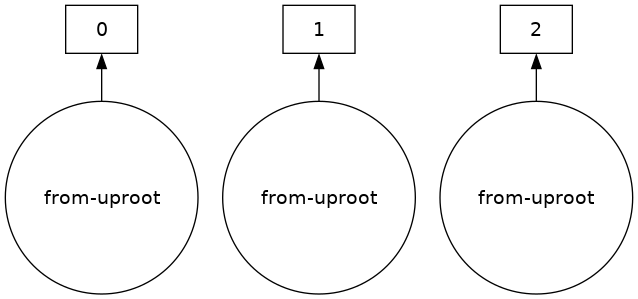

In [21]:
events.visualize()

In [15]:
# Run two files concurrently
file1 = data['GluGlutoHHto2B2Tau_kl-1p00_kt-1p00_c2-0p00']['filelist'][0]
file2 = data['GluGlutoHHto2B2Tau_kl-1p00_kt-1p00_c2-0p00']['filelist'][1]

In [16]:
rs.COPY_LOCAL = False
rs.STEP_SIZE = '140MB'

In [35]:
# Try a large dataset


In [28]:
events = proc.loadfile(file2, 2)

In [33]:
events = proc.evtsel(events)

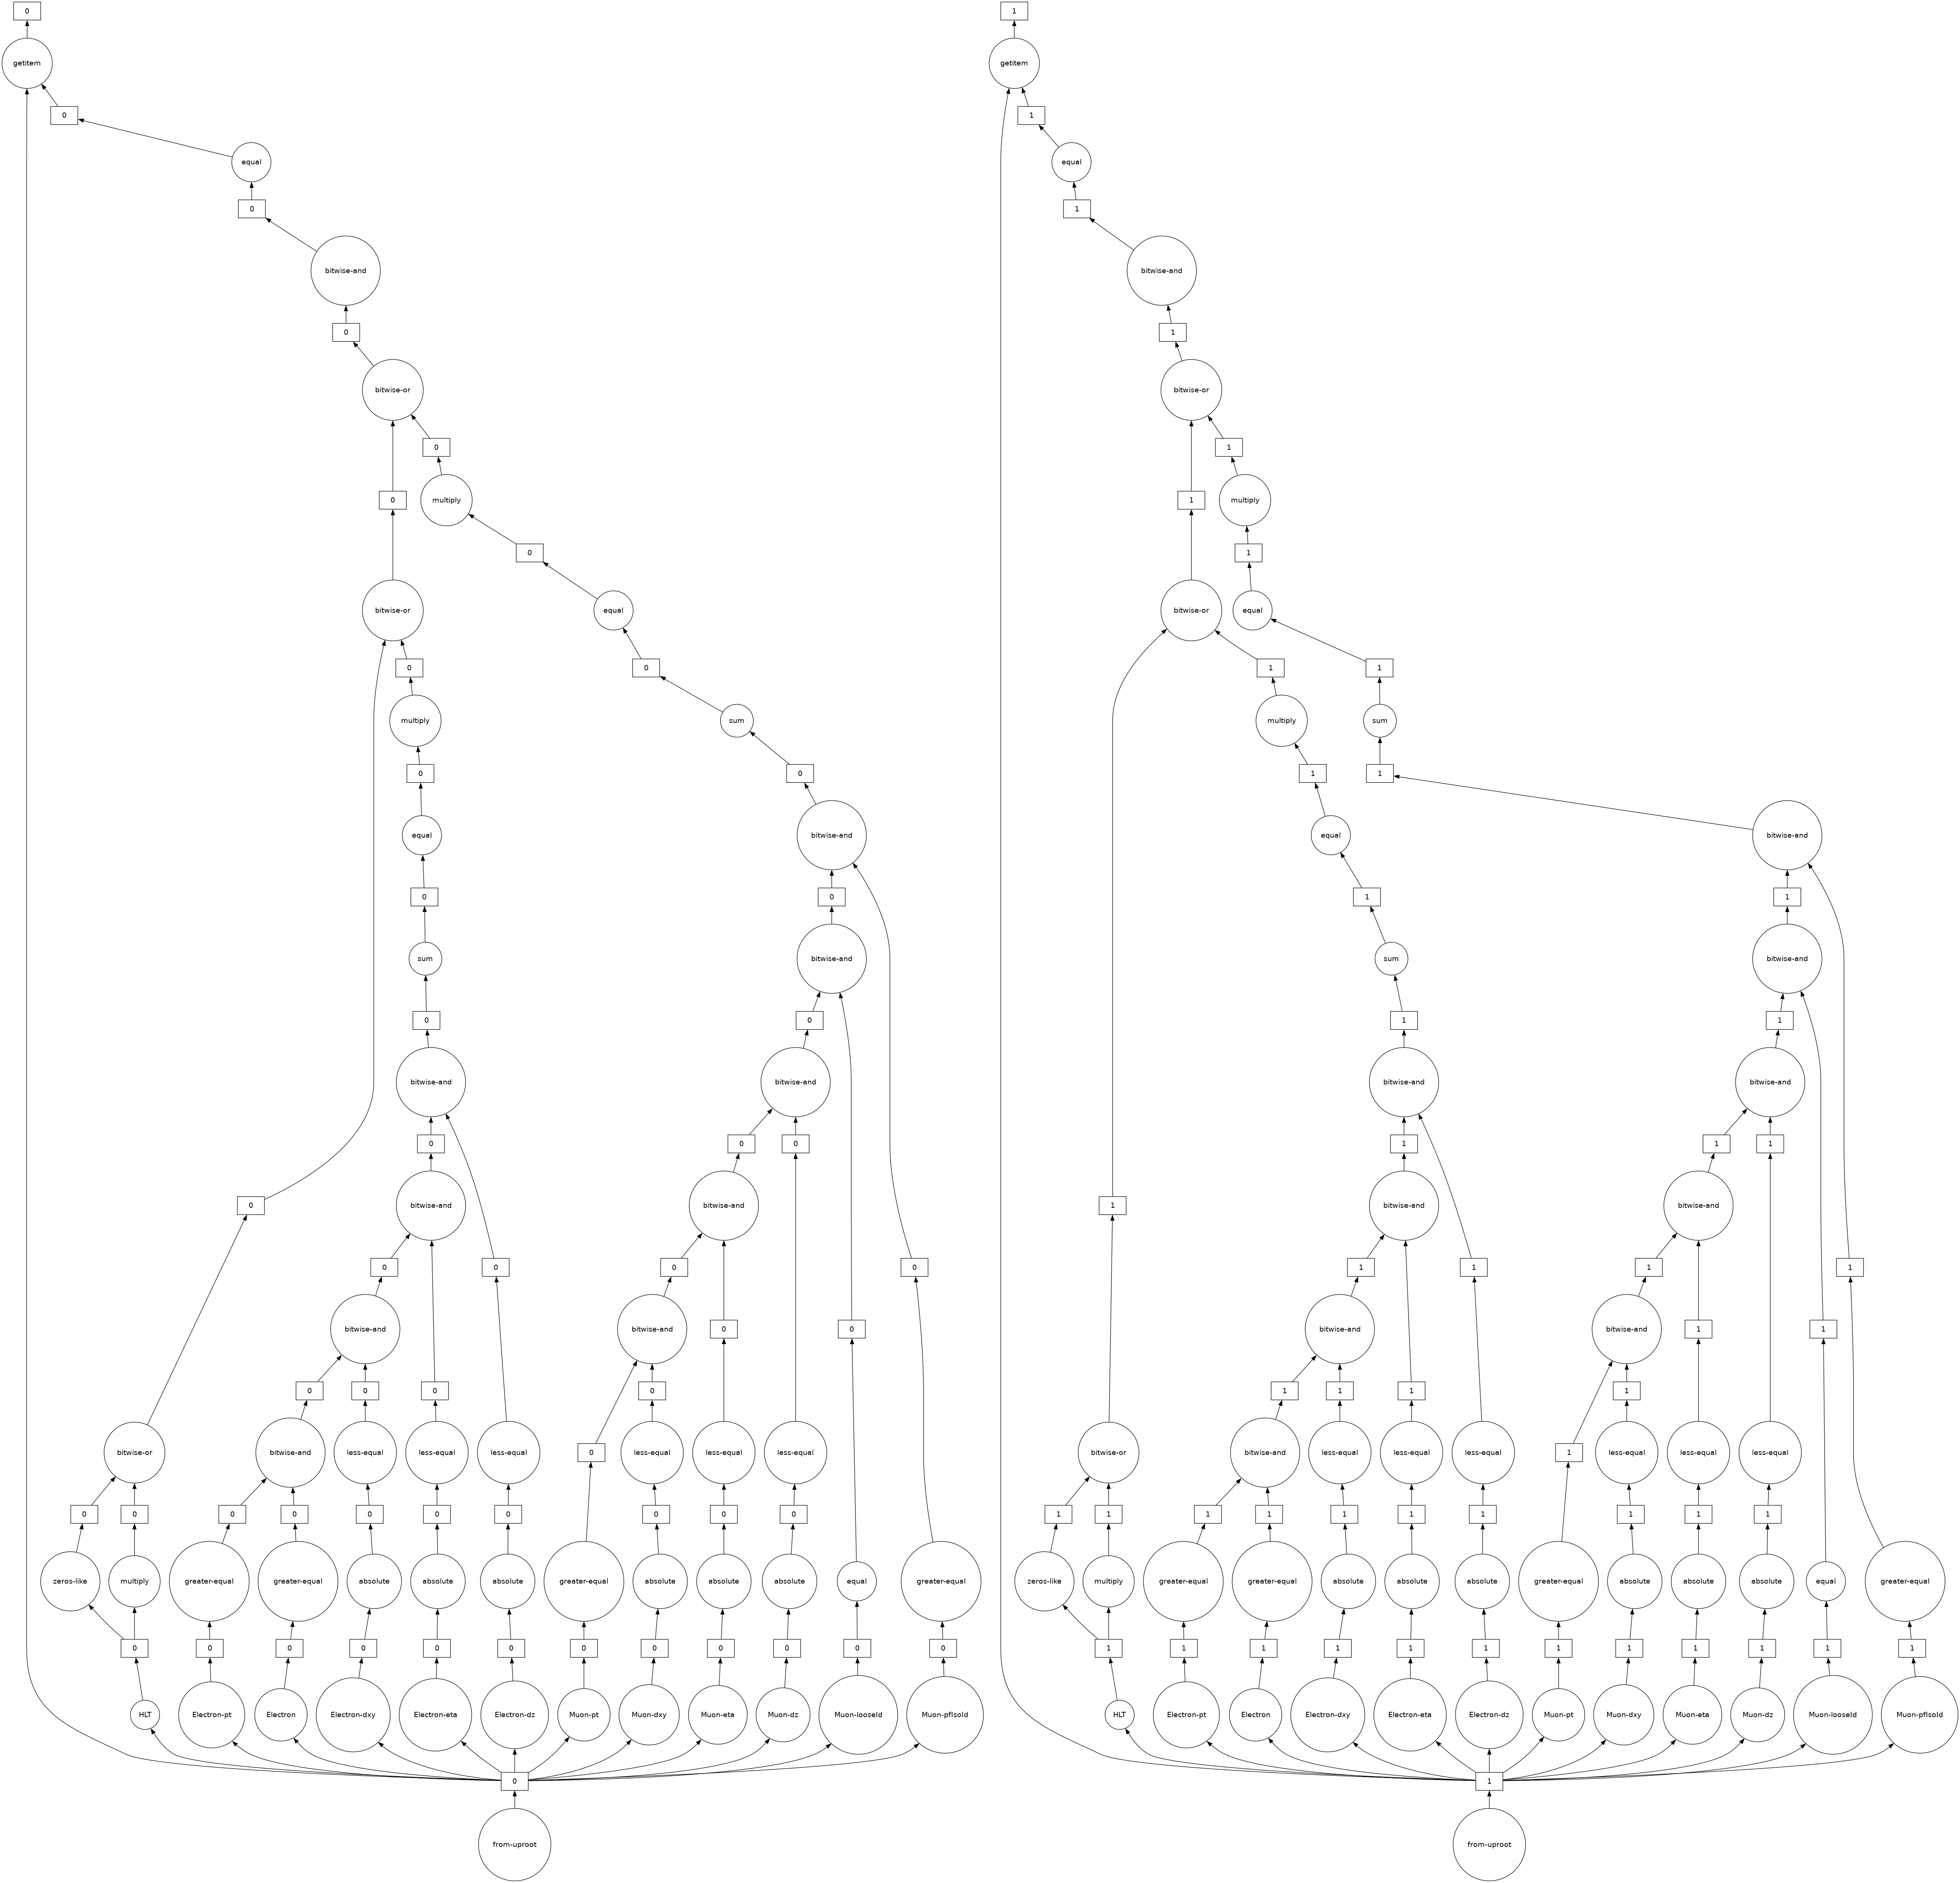

In [34]:
events.visualize()

In [31]:
# test map_partitions
dak.map_partitions(proc.evtsel.setevtsel, events)

TypeError: map_partitions expects at least one Dask collection instance, you are passing non-Dask collections to dask-awkward code.
observed argument types:
- <class 'awkward.highlevel.Array'>

In [36]:
proc.runfile(file2, 2)


Traceback (most recent call last):
  File "/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-centos8-gcc11-opt/lib/python3.9/site-packages/distributed/utils.py", line 803, in wrapper
    return await func(*args, **kwargs)
  File "/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-centos8-gcc11-opt/lib/python3.9/site-packages/distributed/worker.py", line 1508, in close
    await self.finished()
  File "/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-centos8-gcc11-opt/lib/python3.9/site-packages/distributed/core.py", line 592, in finished
    await self._event_finished.wait()
  File "/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos8-gcc11-opt/lib/python3.9/asyncio/locks.py", line 226, in wait
    await fut
asyncio.exceptions.CancelledError
Timed out during handshake while connecting to tcp://127.0.0.1:39135 after 30 s
Traceback (most recent call last):
  File "/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-centos8-gcc11-opt/lib/python3.9/site-packages/tornado/iostream.py", line 867, in _re

'file root://cmsxrootd.fnal.gov//store/mc/Run3Summer22EENanoAODv12/GluGlutoHHto2B2Tau_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/80000/d76d5b20-9372-4f12-81af-205c7acbcd70.root processed successfully!'

In [35]:
# manually trim memory
import ctypes

def trim_memory() -> int:
    libc = ctypes.CDLL("libc.so.6")
    return libc.malloc_trim(0)

client.run(trim_memory)

{'tcp://127.0.0.1:34715': 1}

In [36]:
import tracemalloc 
tracemalloc.start() 

In [37]:
snapshot = tracemalloc.take_snapshot() 
top_stats = snapshot.statistics('lineno') 
  
for stat in top_stats[:10]: 
   print(stat)

/cvmfs/sft.cern.ch/lcg/views/LCG_104/x86_64-centos8-gcc11-opt/lib/python3.9/site-packages/dask/base.py:1136: size=7313 KiB, count=1, average=7313 KiB
/uscms/home/joyzhou/nobackup/coffeajup/lib/python3.9/site-packages/uproot/model.py:778: size=4787 KiB, count=65018, average=75 B
/uscms/home/joyzhou/nobackup/coffeajup/lib/python3.9/site-packages/uproot/source/cursor.py:49: size=3560 KiB, count=70065, average=52 B
/uscms/home/joyzhou/nobackup/coffeajup/lib/python3.9/site-packages/uproot/model.py:857: size=3398 KiB, count=20714, average=168 B
/uscms/home/joyzhou/nobackup/coffeajup/lib/python3.9/site-packages/uproot/source/cursor.py:116: size=2772 KiB, count=41917, average=68 B
/uscms/home/joyzhou/nobackup/coffeajup/lib/python3.9/site-packages/uproot/model.py:782: size=2031 KiB, count=32502, average=64 B
/uscms/home/joyzhou/nobackup/coffeajup/lib/python3.9/site-packages/uproot/model.py:783: size=1776 KiB, count=32470, average=56 B
/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-c

In [38]:
!pip install guppy3

^C


In [22]:
import cProfile

In [30]:
# inspect task graph to see if there's inefficiency
passed = proc.evtsel(events)

TypeError: Converting from an nplike without known data to an nplike with known data is not supported

This error occurred while calling

    ak.to_numpy(
        <Array-typetracer [...] type='## * bool'>
        allow_missing = True
    )

In [ ]:
passed.visualize()

In [27]:
future1 = client.submit(job, file1, 1, 'ggF')
future2 = client.submit(job, file2, 2, 'ggF')

In [29]:
type(future1)

distributed.client.Future

In [28]:
client.gather([future1, future2])

[False, False]

## Inspect a skimmed file and run custom selections

In [50]:
filename = 'GluGlutoHHto2B2Tau_kl-1p00_kt-1p00_c2-0p00_1-part0.root'
dirname = '/uscms/home/joyzhou/nobackup/output/ggF'
proc = Processor(rs, 'ggF', prelimEvtSel)

In [51]:
evts = proc.loadfile(pjoin(dirname, filename), 0)
# Do something after this cell to conduct inspection

In [53]:
proc.runfile(pjoin(dirname, filename), 0)

'file /uscms/home/joyzhou/nobackup/output/ggF/GluGlutoHHto2B2Tau_kl-1p00_kt-1p00_c2-0p00_1-part0.root processed successfully!'

In [54]:
result = pjoin('/uscms/home/joyzhou/nobackup/tests', 'ggF_0-part0.root')
fit_evts = proc.loadfile(result, 'test')

## Run over example files

In [9]:
# custom-define datasets to process 
process_names = ["TTbar", "ggF", "SingleH"]
data_src = 'src/data/preprocessed'

In [9]:
# Quick hack
ds_names = ["DYJets", "TTbar", "ggF"]
filelist = ["root://cmsxrootd.fnal.gov//store/mc/Run3Winter22NanoAOD/DYJetsToLL_M-10to50_TuneCP5_13p6TeV-madgraphMLM-pythia8/NANOAODSIM/122X_mcRun3_2021_realistic_v9-v1/30000/10e16df1-d8bb-4b32-bb90-32c4fd57f429.root",
           "root://cmsxrootd.fnal.gov//store/mc/Run3Summer22EENanoAODv12/TTto2L2Nu_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/62aea484-cae5-4c41-8803-08969f44c116.root",
           "root://cmsxrootd.fnal.gov//store/mc/Run3Summer22EENanoAODv12/GluGlutoHHto2B2Tau_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/80000/5998ad11-ab82-41bf-a740-7a2c38b85a14.root"]

In [10]:
finame = filelist[1]
proc = Processor(rs, 'TTbar')

In [18]:
events = proc.loadfile(finame, 'test')

In [36]:
proc.outdir

'/uscms/home/joyzhou/nobackup/tests'

In [37]:
proc = Processor(rs, 'TTbar', mockskimEvtSel)

In [ ]:
# examine the file later
proc.runfile()

In [17]:
# create an object mask
tau_mask = (events['Tau_pt'] > 25) & (abs(events['Tau_eta']) < 3.0)

In [9]:
for i, ds in enumerate(ds_names):
    proc = Processor(rs, ds)
    proc.runfile(filelist[i], 0, None)

In [15]:
output_fi = os.listdir(rs.OUTPUTDIR_PATH)

In [21]:
dfs = []
for file_name in output_fi:
    df = pd.read_csv(pjoin(rs.OUTPUTDIR_PATH, file_name), index_col=0, header=0)
    df.columns = [file_name]
    dfs.append(df)

In [22]:
raw_df = pd.concat(dfs, axis=1)

In [23]:
raw_df

,DYJets_cutflow_0.csv,TTbar_cutflow_0.csv,ggF_cutflow_0.csv
initial,506334,927960,80104
ElectronSelection,500522,525938,45205
MuonSelection,488033,289438,31124
TauSelection,361,32286,14806


In [24]:
efficiency_df = raw_df.div(raw_df.shift(1)).fillna(1)

In [25]:
# incremental
efficiency_df

,DYJets_cutflow_0.csv,TTbar_cutflow_0.csv,ggF_cutflow_0.csv
initial,1.000000,1.000000,1.000000
ElectronSelection,0.988521,0.566768,0.564329
MuonSelection,0.975048,0.550327,0.688508
TauSelection,0.000740,0.111547,0.475710


In [26]:
overall_eff = raw_df.div(raw_df.iloc[0]).fillna(1)

In [27]:
# wrt to total
overall_eff

,DYJets_cutflow_0.csv,TTbar_cutflow_0.csv,ggF_cutflow_0.csv
initial,1.000000,1.000000,1.000000
ElectronSelection,0.988521,0.566768,0.564329
MuonSelection,0.963856,0.311908,0.388545
TauSelection,0.000713,0.034792,0.184835


In [ ]:
# Run small scale selections on one file for each process
def runsample(dsnames, datasrc):
    samplefl = []
    for name in dsnames:
        with open(pjoin(datasrc, f'{name}.json'), 'r') as file:
            meta = json.load(file)
            samplefl.append(meta)